### import necessary libraries

In [10]:
import pandas as pd
import os

### merging 12 months of sales data in a single file

In [75]:
df= pd.read_csv("./Sales_Data/Sales_April_2019.csv")

In [5]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


In [11]:
#printing all files name
files=[file for file in os.listdir('./Sales_Data')]
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [9]:
 # creating an empty dataframe to get the merge files
all_months_data = pd.DataFrame()

In [12]:
for file in files:
    df=pd.read_csv("./Sales_Data/"+file)
    all_months_data=pd.concat([all_months_data,df])
    

In [15]:
#writing the merged dataframe into a csv file
all_months_data.to_csv("all_data.csv",index=False)

In [16]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [76]:
#adding a city column
def get_city(address):
    return address.split(',')[1]
all_data['City']=all_data['Purchase Address'].apply(lambda x:get_city(x))


In [17]:
#Adding a month column
all_data['Month']=all_data['Order Date'].str[0:2]

In [20]:
#Cleanup the data
nan_df=all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
all_data=all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [22]:
temp_df=all_data[all_data['Order Date'].str[0:2]=='Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [23]:
all_data=all_data[all_data['Order Date'].str[0:2]!='Or']

In [25]:
all_data['Month']=all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [26]:
###Add a Sales column(Quantity * Price)
# Converting column to integer for arithmatic operation
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each']=pd.to_numeric(all_data['Quantity Ordered'])

In [28]:
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,2,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4
2,176559,Bose SoundSport Headphones,1,1,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,1
3,176560,Google Phone,1,1,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1
4,176560,Wired Headphones,1,1,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1
5,176561,Wired Headphones,1,1,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,1


### Question 1: What was the best month for sales? How much was earned that month?

In [35]:
results=all_data.groupby('Month').sum()

In [30]:
import matplotlib.pyplot as plt
months = range(1,13)

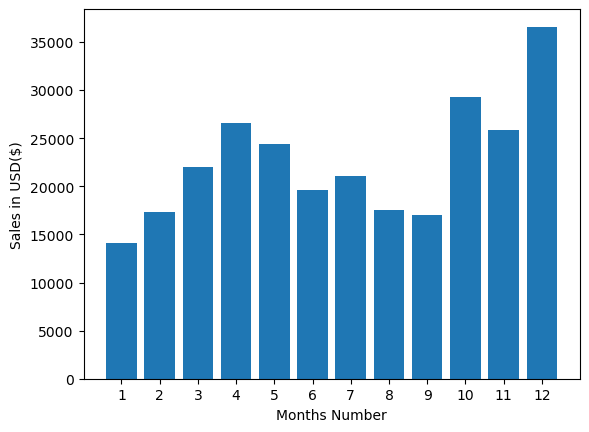

In [36]:
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD($)')
plt.xlabel('Months Number')
plt.show()

### Question 2:What city sold the most product?

In [54]:
# adding a column for state 

def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,2,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,1,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,1,Boston (MA)
3,176560,Google Phone,1,1,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1,Los Angeles (CA)
4,176560,Wired Headphones,1,1,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1,Los Angeles (CA)
5,176561,Wired Headphones,1,1,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,1,Los Angeles (CA)


In [55]:
all_data.groupby(['City']).sum()


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,16602,104794,21184
Austin (TX),11153,11153,69829,14469
Boston (MA),22528,22528,141112,29600
Dallas (TX),16730,16730,104620,21964
Los Angeles (CA),33289,33289,208325,43241
New York City (NY),27932,27932,175741,36106
Portland (ME),2750,2750,17144,3500
Portland (OR),11303,11303,70621,14849
San Francisco (CA),50239,50239,315520,65223


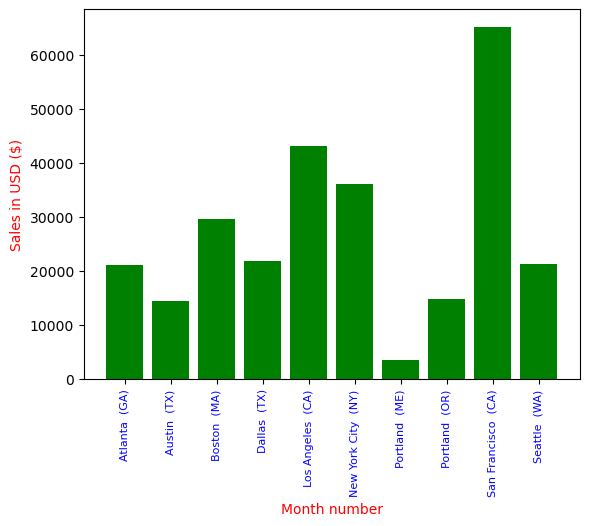

In [62]:
import matplotlib.pyplot as plt

keys = [city for city, df in all_data.groupby(['City'])]

plt.bar(keys,all_data.groupby(['City']).sum()['Sales'], color='g')
plt.ylabel('Sales in USD ($)', color='r')
plt.xlabel('Month number', color='r')
plt.xticks(keys, rotation='vertical',size=8, color='b')
plt.show()

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [64]:
# Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,2,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,1,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,1,Boston (MA),22,30,1
3,176560,Google Phone,1,1,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,1,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,1,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,1,Los Angeles (CA),9,27,1


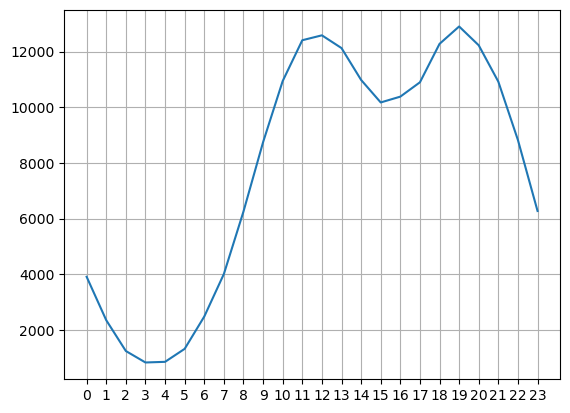

In [65]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()


### Question 4: What products are most often sold together?

In [67]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Question 5:What product sold the most? Why do you think it sold the most?

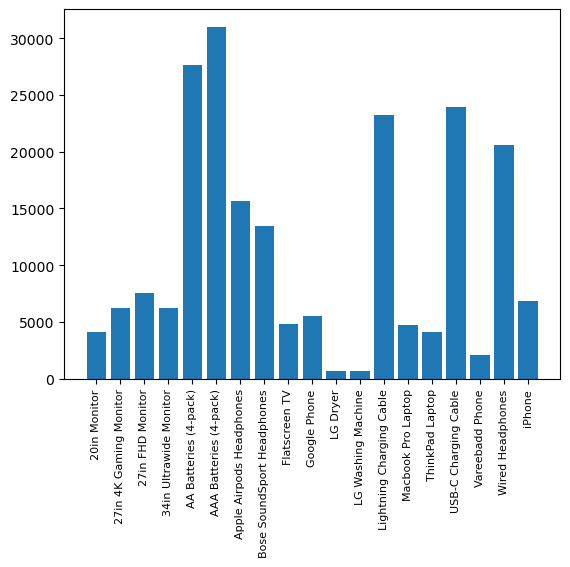

In [70]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_3276\148863181.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
C:\Users\Admin\AppData\Local\Temp\ipykernel_3276\148863181.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


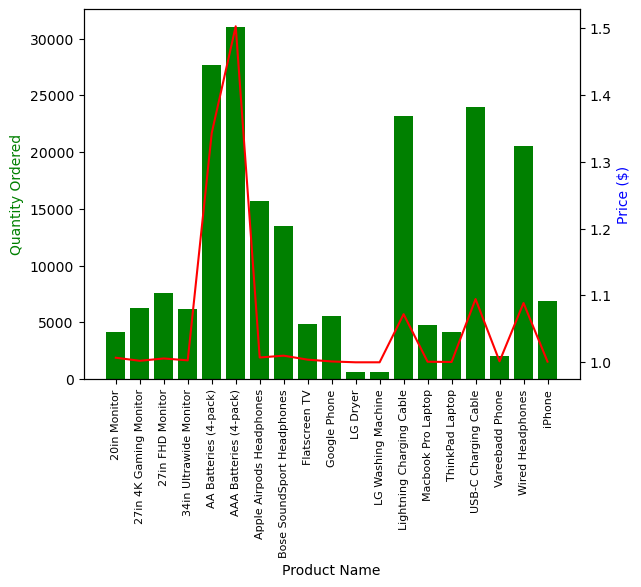

In [73]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='r')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()